# Session 2

## NumPy, Matplotlib and Pandas

The core of Python includes the basic features of the language. All other features are included in separate packages (called libraries or toolboxes in other programming languages). During this session we will have a first look at arrays and dataframes, create some simple graphs and fit a line through some data.

The package for creating and manipulating arrays is called `numpy`. The `numpy` package also includes a set of very useful functions, including basic mathematical functions (`cos`, `exp`, `log`, `sum`, etc.). An in-depth discussion of `numpy`'s functionality is impossible here, but useful resources can be found online, including at <A href="https://numpy.org/doc/stable/reference/">https://numpy.org/doc/stable/reference/</A>.

The main package for plotting in Python is `Matplotlib`. It is a comprehensive plotting package that is highly versatile. The <A href="https://matplotlib.org/stable/gallery/index.html"> gallery on the Matplotlib webpage</A> is a great resource to discover  the possibilities to create fantastic plots and animations. 

`Pandas` is the package that handles dataframes. Dataframes are a bit similar to arrays but they have additional functionalities that make working with large datasets, especially time series data, a lot easier. A good starting point for more information is <A href="https://pandas.pydata.org/docs/user_guide/index.html">https://pandas.pydata.org/docs/user_guide/index.html</A>.

## Arrays and NumPy

Before a package can be used, it needs to be imported. The following line imports the `numpy` package and renames it to `np` (the default short name used by essentially everyone)

In [1]:
import numpy as np

Once the package is imported this way, all of its functions can be called as `np.function_name()`. For example, the `sqrt` function

In [2]:
np.sqrt(2)

1.4142135623730951

### Creating arrays

There are multiple ways to create an array. For example, a `list` can be converted to a `numpy` `array` with the `np.array()` command. 

In [3]:
a = np.array([1, 2, 3, 4])
print(a)
print(type(a))

[1 2 3 4]
<class 'numpy.ndarray'>


The `type` function shows that the array is defined within the `numpy` package as an `ndarray`, which stands for n-dimensional array. All elements within such an array have the same variable type (remember that a `list` can contain items of different variable types).

A two-dimensional array can be thought of as a matrix with rows and columns. It can be created by entering a list of rows, where each row is again a list that contains the values for that row. Care must be taken that each of the lists has the same number of elements (equal to the number of columns). When the array is printed to the screen, each row is on a separate line and the columns are separated by a space

In [4]:
A = np.array([[0, 1, 2, 3], [4, 5, 6, 7], [8, 9, 10, 11]])
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


The shape of an array can be obtained by calling the `shape` function. For a two-dimensional array it returns the number of rows and columns

In [5]:
print(np.shape(A))

(3, 4)


***Exercise 2.1***: Use list comprehension to create a one-dimensional array that contains the square of all whole numbers between 1 and 10.

In [6]:
# Type your code here

Functions that work for individual numbers can also be used on arrays, for example `numpy`'s `sqrt` function

In [7]:
print('sqrt(a) gives:', np.sqrt(a))

sqrt(a) gives: [1.         1.41421356 1.73205081 2.        ]


Arithmetic operators can also be be used with arrays. The following code defines an array `b` and multiplies the arrays `a` and `b` element by element

In [8]:
b = np.array([2, 2, 3, 3])
print('a * b gives:', a * b)

a * b gives: [ 2  4  9 12]


Those working with matrices might have expected a different outcome: The dot product. The dot product of arrays `a` and `b` of length `N` (i.e., $\sum_{n=1}^N a_nb_n$) is obtained by using the `@` operator

In [9]:
a @ b # Or, alternatively: np.dot(a, b)

27

In addition to converting a list to an array using the `np.array()` function, arrays can be generated with the `np.arange` function (similar to the `range` function used earlier, but now resulting in an array). The `arange(start, end_before, step)` function creates an array starting at `start`, taking steps equal to `step` and stopping (remember again) before it reaches the specified `end_before` value. If only a single value is passed to the function, it is  interpreted to be the `end_before` value (i.e., the default values for `start` and `step` are 0 and 1, respectively). The following examples demonstrate this

In [10]:
print(np.arange(3)) # so start=0 and step=1
print(np.arange(2, 6)) # step=1
print(np.arange(2, 10, 2))
print(np.arange(10, 0, -2)) # steps can be negative
print(np.arange(2, 10, 2.0)) # now returns array of floats

[0 1 2]
[2 3 4 5]
[2 4 6 8]
[10  8  6  4  2]
[2. 4. 6. 8.]


Using a negative `step` is possible as long as the `start` argument is larger than the `end_before` argument. Note that the default type of `np.arange` is integers unless one of the arguments is a float. 

Instead of specifying a `step`, it is also possible to create an array by specifying the number of elements using the `np.linspace(begin, end, num)` function. The following function call returns seven points with values of equal increment from 1 to 4. Note that, somewhat confusingly, and unlike `range` and `np.arange`, the `end` value in `linspace` is included as the last element of the array! The default return value of `np.linspace` is an array of floats.

In [11]:
np.linspace(1, 4, 7)

array([1. , 1.5, 2. , 2.5, 3. , 3.5, 4. ])

Arrays can be reshaped as long as the new shape is compatible with the old shape. For example, a one-dimensional array with 12 elements can be reshaped into a two-dimensional array with 3 rows and 4 columns

In [12]:
a = np.arange(12)
print(a)
b = np.reshape(a, (3, 4))
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### Slicing arrays
Just like for a `list`, the individual elements of an array can be accessed by indexing using square brackets (remember that the first index has number 0). For a one-dimensional array `x ` this  would look like `x[start:end_before]` or `x[start:end_before:step]`. If the `start` or `end_before` isn't specified, 0 will be used. If the `step` isn't specified, 1 will be used. 

When programming, the index of the end is generally not known as the array size can vary. To find out how long the array is and access the last value of array `x` one could type `x[len(x)-1]`, but that is a bit inconvenient. Luckily, there is a shortcut: `x[-1]` is the same as `x[len(x)-1]` and represents the last value in the array. Typing `x[-2]` returns the second to last value in the array, etc..

The following code examples show some of the various array slicing options

In [13]:
x = np.arange(20, 30)
print(x)
print(x[0])
print(x[0:5])
print(x[:5]) # result is the same as for the previous line
print(x[-5:]) # returns the last 5 values
print(x[3:7])
print(x[2:9:2]) # step is 2
print(x[-1:4:-2]) # starts at back, stops before reaching index 4 with step -2
print(x[[0, 3, 7]]) # passes indices as a list

[20 21 22 23 24 25 26 27 28 29]
20
[20 21 22 23 24]
[20 21 22 23 24]
[25 26 27 28 29]
[23 24 25 26]
[22 24 26 28]
[29 27 25]
[20 23 27]


***Exercise 2.2***: The code cell below defines the array `y` which contains five elements. Use array slicing to calculate the difference between each consecutive element. The first number should be the difference between 5 and 1 (= 4), the second number between 3 and 5 (= -2), and so on.

In [14]:
# Type your code here

Slicing two-dimensional arrays requires specification of the row and column indices, either explicitly or implicitly as shown in the code below, which illustrates some ways to select single numbers, individual rows or columns and two-dimensional subarrays. Once more: Recall that the first row of a two-dimensional array is row 0, and the first column is column 0.

In [15]:
print(A)
print(A[1, 2]) # second row, third column
print(A[1])  # second row
print(A[1, :]) # alternative for the second row
print(A[:, 0])  # first column
print(A[1:3, 1:3]) # an array with the second and third rows and columns

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
6
[4 5 6 7]
[4 5 6 7]
[0 4 8]
[[ 5  6]
 [ 9 10]]


#### Slicing arrays with conditional operators
Parts or values of an array may also be selected based on conditions. This is called advanced slicing. For example

In [16]:
a = np.arange(5)
print(a)
print(a < 3) # a < 3 returns a Boolean array

[0 1 2 3 4]
[ True  True  True False False]


Because `<` is a conditional operator, the statement `a < 3` returns a boolean array. Instead of printing the outcome to the screen as in the above example, a more useful application is to store it as a variable. The variable can then be used to slice the array 

In [17]:
idx = a < 3
print('values in array a less than 3:', a[idx])

values in array a less than 3: [0 1 2]


The `~` operator swaps the `True` and `False` values

In [18]:
print('values in array not less than 3:', a[~idx])

values in array not less than 3: [3 4]


For more compact and readable code, the conditional statement can  be specified inside the square brackets. It can even be used to assign a different value to selected elements of an array

In [19]:
a[a < 3] = 10  # Replace all values less than 3 by 10
print('new a:', a)

new a: [10 10 10  3  4]


Conditions for indices can be compounded with either `&` (and) or `|` (or), when the conditions are put between parentheses

In [20]:
a = np.arange(10)
print('array:', a)
print('larger than 3 and less than 7:', a[(a > 3) & (a < 7)])

array: [0 1 2 3 4 5 6 7 8 9]
larger than 3 and less than 7: [4 5 6]


***Exercise 2.3***: Find the numbers in `a` that are less than 2 *or* larger than 8.

In [21]:
# Type your code here

## Basic graphs with Matplotlib


Most of `matplotlib`'s plotting capabilities are available in the subpackage `pyplot`, which is commonly renamed as `plt` when imported. All figures can be included inline in a notebook (rather than in a separate window) with the IPython magic command `%matplotlib inline`. IPython `magic commands` are preceded with a `%`. They are not standard Python commands and only work within IPython environments.

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

The following two lines of code compute $\sin(x)$ for 100 values of $x$ between 0 and $\pi$, and then plot $\sin(x)$ vs. $x$

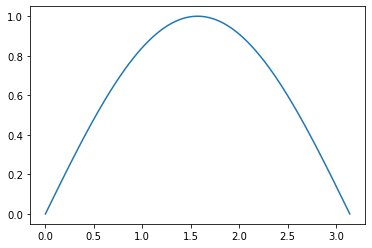

In [23]:
x = np.linspace(0, np.pi, 100)
plt.plot(x, np.sin(x));

The plot function has many, many options, as may be seen from the documentation. 
A more complex graph with multiple lines, labels along the axes, and a legend is shown below. `matplotlib` uses a different color for each line that is plotted. The default colors are called `C0`, `C1`, `C2`, etc. Alternatively, a different color can be specified. 

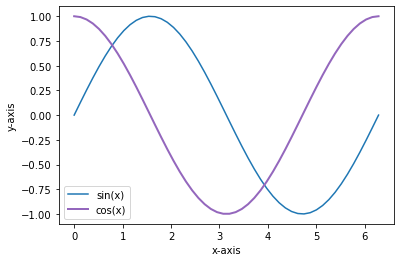

In [24]:
x = np.linspace(0, 2 * np.pi, 50)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x, y1, '-', label='sin(x)')  # plotted with default color C0
plt.plot(x, y2, color='C4', lw=2, label='cos(x)')  # linewidth (lw) is 2
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(); # selects best spot for legend unless loc is specified

***Exercise 2.4***: Change the code block above so that the color of the second line is one of the default Matplotlib colours instead of purple. Also plot the sine function as individual dots instead of a line.

## Dataframes and Pandas

A `DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it as a spreadsheet table, and it resembles an array, but it has lots of additional functionality. A DataFrame typically has row labels (called an index) and column names. The best way to get familiar with DataFrames is probably by looking at a practical example. Here we will use `Pandas` `read_csv` function to read a file with stream discharge and stage data and we will use `NumPy` to fit a power function to the stage-discharge relationship (also known as a rating curve).

The data used are for stream gauging station USGS 09246500 ELKHEAD CREEK NEAR CRAIG, CO, which can be found on https://waterdata.usgs.gov/nwis/measurements/?site_no=09246500.

The code cell below shows how the file can be imported. It is a tab-delimited text file with various header lines. The `read_csv` function takes the following arguments:

 - the file name (09246500_Q-h_data.txt)
 - the column delimiter, in this case a tab, which is indicated by `\t`
 - the number of the column that should become the index (i.e., the row labels)
 - a boolean that indicates if the values of the index column should be converted to dates
 - a list with the numbers of the header lines to skip (open the file in a text editor and check if you understand how list comprehension is used in this case to get the lines we need)
 
Before executing the `read_csv` command, `Pandas` must be imported. Once the file has been read, the `DataFrame` is available as `df`. The `head()` function can be used to see the first 5 rows of data.

In [25]:
!wget https://raw.githubusercontent.com/vincentpost/PythonEssentialsIII/main/09246500_Q-h_data.txt
import pandas as pd

df = pd.read_csv('09246500_Q-h_data.txt', 
                 sep='\t',
                 index_col=3,
                 parse_dates=True,
                 skiprows=[i for i in range(16) if i != 14])

df.head()

,agency_cd,site_no,measurement_nu,tz_cd,q_meas_used_fg,party_nm,site_visit_coll_agency_cd,gage_height_va,discharge_va,measured_rating_diff,gage_va_change,gage_va_time,control_type_cd,discharge_cd
measurement_dt,,,,,,,,,,,,,,
2008-04-17 11:00:00,USGS,9246500,1,MDT,Yes,KLM,USGS,2.38,127.00,Good,0.0,0.5,Clear,NONE
2008-06-17 10:10:00,USGS,9246500,2,MDT,Yes,KLM,USGS,3.31,232.00,Fair,0.0,0.6,Clear,NONE
2008-07-11 14:05:00,USGS,9246500,3,MDT,Yes,JBF,USGS,2.17,22.30,Fair,0.0,0.5,DebrisLight,NONE
2008-07-17 10:57:00,USGS,9246500,4,MDT,Yes,JBF,USGS,1.89,7.97,Good,0.0,0.4,VegetationLight,NONE
2008-08-05 14:03:00,USGS,9246500,5,MDT,Yes,KLM,USGS,1.67,2.55,Poor,0.0,0.3,VegetationLight,NONE


The column names used by the USGS are a bit cryptic, but the stream stage is under `gage_height_va` and the measured discharge is called `discharge_va`. To get a first idea of the data, we can plot the stage versus time. Remember that the dates were used for the DataFrame's index, so they can be accessed using `df.index`.

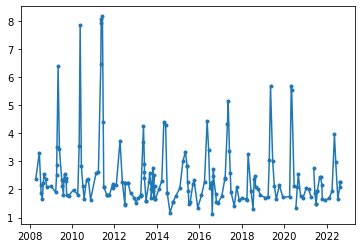

In [26]:
plt.plot(df.index, df['gage_height_va'], '.-')

The goal is to use these measurements to derive a stage-discharge relationship. In order to do so, we want to select only the most reliable data, which in this case have the qualification 'Good' in the column called `measured_rating_diff`. A DataFrame can be sliced in a similar way as an `array`, the only difference is that the square brackets can't be typed directly after the DataFrame's name. Instead, the `loc` property must be used, as illustrated below. The first line of code creates an array with `True` and `False` values, depending on the values in the column 'measured_rating_diff'. These are used as indices to slice the DataFrame `df`, and the result of the slicing operation is stored in the DataFrame called 'dfsub'.

In [27]:
idx = (df['measured_rating_diff'] == 'Good')
dfsub = df.loc[idx]

dfsub.head()

,agency_cd,site_no,measurement_nu,tz_cd,q_meas_used_fg,party_nm,site_visit_coll_agency_cd,gage_height_va,discharge_va,measured_rating_diff,gage_va_change,gage_va_time,control_type_cd,discharge_cd
measurement_dt,,,,,,,,,,,,,,
2008-04-17 11:00:00,USGS,9246500,1,MDT,Yes,KLM,USGS,2.38,127.00,Good,0.0,0.5,Clear,NONE
2008-07-17 10:57:00,USGS,9246500,4,MDT,Yes,JBF,USGS,1.89,7.97,Good,0.0,0.4,VegetationLight,NONE
2008-10-05 18:15:00,USGS,9246500,8,MDT,Yes,KLM,USGS,2.36,43.40,Good,0.0,0.5,Clear,NONE
2009-04-09 13:44:00,USGS,9246500,12,MDT,Yes,KLM/HLK,USGS,2.51,74.70,Good,0.0,0.8,Clear,NONE
2009-04-13 11:54:30,USGS,9246500,13,MDT,Yes,KLM,USGS,2.88,151.00,Good,0.0,0.5,Clear,NONE


The code cell below selects only the columns 'gage_height_va' and 'discharge_va' from `dfsub` and removes all other ones, resulting in a smaller DataFrame without any redundant information

In [28]:
dfsub = dfsub[['gage_height_va', 'discharge_va']]
dfsub.head()

,gage_height_va,discharge_va
measurement_dt,,
2008-04-17 11:00:00,2.38,127.00
2008-07-17 10:57:00,1.89,7.97
2008-10-05 18:15:00,2.36,43.40
2009-04-09 13:44:00,2.51,74.70
2009-04-13 11:54:30,2.88,151.00


The stage-discharge relationship takes the following form

$$ Q = a h^b$$

where $Q$ is the discharge, $h$ is the stream stage and $a$ and $b$ are curve fitting parameters. With `NumPy` we can fit polynomial equations, but a power relationship like this one can't be fitted directly. To solve this, the relationship can be log-transformed, resulting in a linear equation

$$ log(Q) = log(a) + b \cdot log(h)$$

So, the data need to be log-transformed first, which is easy using `NumPy's` `log` function, which also works with DataFrames

In [29]:
log_wl = np.log(dfsub['gage_height_va'])
log_Q = np.log(dfsub['discharge_va'])

Fitting the data to the linearised expression is done using `NumPy's` `polyfit` function. The first two arguments are the dependent and independent variable, respectively.  The third argument is the degree of the polynomial, which is 1 for a linear relationship

In [30]:
b, log_a = np.polyfit(log_wl, log_Q, 1)

The return values (`b` and `log_a`) are the slope ($b$) and the intercept ($log(a)$). To get $a$, `log_a` must be exponentiated

In [31]:
a = np.exp(log_a)
print(b, a)

5.155619788418386 0.5500464172227859


The result can be visualised alongside with the data in a plot

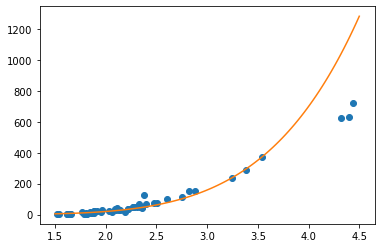

In [32]:
plt.figure()
plt.plot(dfsub['gage_height_va'], dfsub['discharge_va'], 'o')
xvalues = np.linspace(1.5, 4.5, 100)
Qcalc = a * xvalues ** b
plt.plot(xvalues, Qcalc)

Note that `polyfit` does not return the goodness of fit ($R^2$). This is possible in Python of course, but one has to use a different function, like `linregress` in the `SciPy` library.

***Exercise 2.5***: Add labels to the axes of the graph with the stage-discharge relationship.

***Exercise 2.6***: Look up the documentation for the `linregress` funcion (see <A href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html">https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html</A>). Calculate the values for $a$ and $b$ with this function. What is the value of $R^2$? Check the outcome by creating a plot of the data with the stage-discharge relationship.

In [33]:
# Type your code here